In [2]:
#install.packages("moderndive")
library(readr)
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.2
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
fish_data = read_csv("data/fish_info.csv")

Rows: 159 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (4): Weight, Length, Height, Width



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



### Including Species for the Weight Prediction

* Recall that by default, each level of Species is interpreted as an explanatory variable
  * In the absence of another explanatory variables, the mean of each level is used to explain the response.
* Typically visualized using boxplots
* Combining the species and length can be thought of separate linear regressions each for Length from each species
  * This is often referred to as `parallel slopes` regression
  
* Effectively, where we are generating are parallel lines (same slope) but with different intercepts

In [9]:
lm_species = lm(Weight ~ Species + 0, fish_data)
lm_length = lm(Weight ~ Length + 0, fish_data)

Warning message:
“Removed 7 rows containing missing values (geom_segment).”


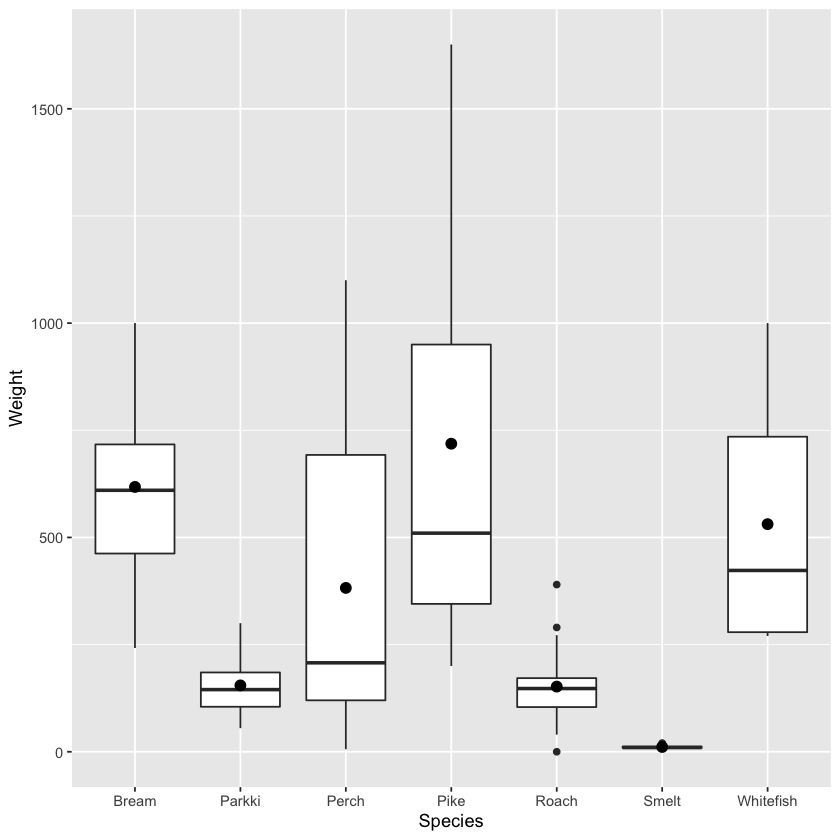

In [10]:
ggplot(fish_data, aes(Species, Weight)) + 
  geom_boxplot() + 
  stat_summary(fun = mean)

In [11]:
lm_speicies_length = lm(Weight ~ Length + Species + 0, fish_data)
summary(lm_speicies_length)


Call:
lm(formula = Weight ~ Length + Species + 0, data = fish_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-243.64  -60.00   -5.96   38.63  397.44 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
Length              42.432      1.221   34.74   <2e-16 ***
SpeciesBream      -668.104     40.472  -16.51   <2e-16 ***
SpeciesParkki     -639.818     37.089  -17.25   <2e-16 ***
SpeciesPerch      -709.779     33.992  -20.88   <2e-16 ***
SpeciesPike      -1083.657     56.948  -19.03   <2e-16 ***
SpeciesRoach      -723.959     33.236  -21.78   <2e-16 ***
SpeciesSmelt      -466.485     29.305  -15.92   <2e-16 ***
SpeciesWhitefish  -691.042     52.916  -13.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.83 on 151 degrees of freedom
Multiple R-squared:  0.9689,	Adjusted R-squared:  0.9672 
F-statistic: 587.4 on 8 and 151 DF,  p-value: < 2.2e-16


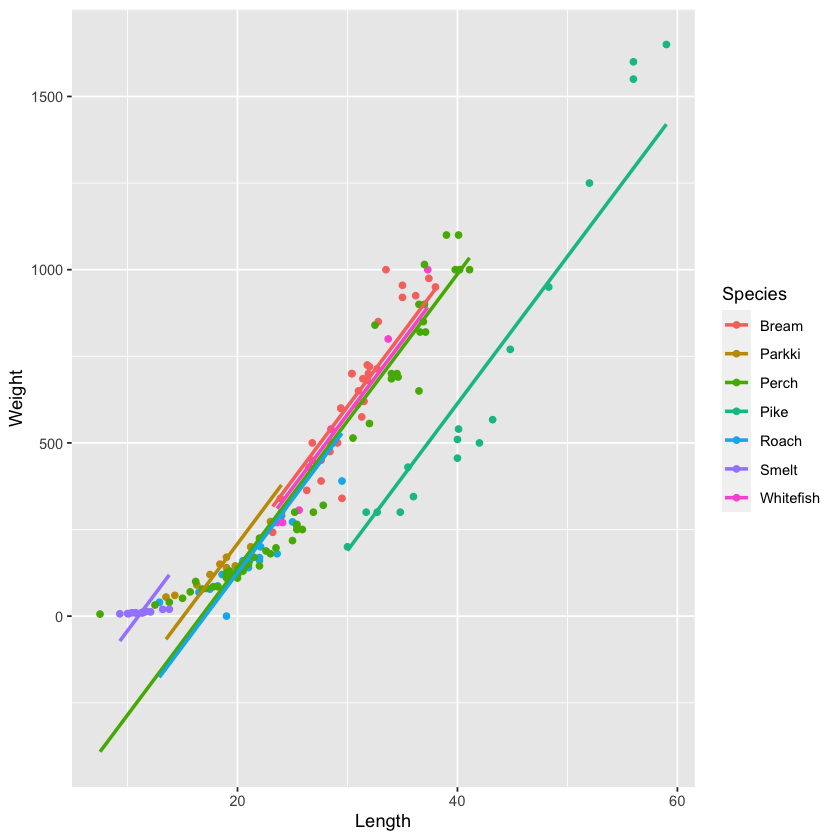

In [12]:
library(moderndive)
ggplot(fish_data, aes(Length, Weight, color=Species)) + 
  geom_point() + 
  geom_parallel_slopes(se=FALSE)


### Assessing the Model Fit

* Assessing the fit is done the same way as with simple linear regression 
  * inspect the residuals standard error
  * Evaluate the fit based on the coefficient of determination (R-squared)


In [13]:
summary(lm_species)$r.squared
summary(lm_length)$r.squared
summary(lm_speicies_length)$r.squared

[1] 0.7200131

[1] 0.8339341

[1] 0.9688658

In [14]:
summary(lm_species)$adj.r.squared
summary(lm_length)$adj.r.squared
summary(lm_speicies_length)$adj.r.squared

[1] 0.707119

[1] 0.8328831

[1] 0.9672163

In [15]:
summary(lm_species)$sigma
summary(lm_length)$sigma
summary(lm_speicies_length)$sigma

[1] 289.4233

[1] 218.6242

[1] 96.8316

### Finding the Best Explanatory Variables

* One of the objectives is to identify the parameters that best explain the data.
  * This means we are looking for the best subset of explanatory variables among all the explanatory variables
* Why not keep all the explanatory variables?
  * A subset is easier to interpret
  * Precision of predicted intervals and confidence bands will be smaller
  * The more parameters the more we overfit the data
* Two good criteria to evaluate models with different parameters are:
  * R^2 covered
  * AIC (Akaike Information Criteria)

### Akaike Information Criteria

* We can use The AIC to find the most optimal model

$$
AIC = n\times log(SS_{residual}) + 2(p+1) - nlog(n)
$$

* The First part measures the goodness of fit
* The second part penalizes the number of parameters in the model. 

* Strategy: compute AIC for each possible combination of explanatory variables
  * The model with the smallest AIC is chosen as the most optimal model. 
* In reality we apply a greedy approach (Forward or backward) and use the AIC to add or remove a variable 
  
 

### Akaike Information Criteria - Cont'd

* Total of 2p models that contain subsets of p variables. 
  * $p = 30$, there are $p^{30} = 1,073,741,824$ total models

* In reality we apply a greedy approach (Forward or backward) and use the AIC to add or remove a variable 
   * 

* Forward selection: fit $p$ simple linear regressions and add to the null model the variable that results in the lowest AIC. This approach is continued until the AIC starts increasing

* Backward selection. We start with all variables in the model, and backward selection removes the variable with the largest contribution to increasing the AIC
 * continue until a stopping rule is reached. 

* Mixed selection: a combination of both. Add and remove as needed

* Can be implemented using `stepAIC` in the `MASS` library
  * Left for the practical


### Explanatory Variable Interaction

* All our previous analyses assumed independence of the explanatory variables

 * Variables increase or decrease independently.

* Such simple models may be incorrect. 
  * There may be a synergistic effect between the variables. 
    * In a model predicting richness, change in the variable PH  may not affect two species equally
      * Increasing PH may lead to incrase abundance of one species and decrease of another
      * This will affect the overall richness at one site
  

### Explanatory Variable Interaction - Cont'd

* Standard linear regression model with two variables: no interaction
$$ Y = \beta_0 + \beta_1 \times  X1 + \beta_2 \times  X2 $$

  * Increase X1 by one unit, then Y will increase by an average of $\beta_1$ units, regardless of the value of X2
  
* We can add interaction to the model by including a third predictor
  * Interaction term
  
$$ 
Y = \beta_0 + \beta_1 \times  X1 + \beta2 \times X2 + \beta_3\times  X1 \times X2
$$

### Interaction Example

* Working with the RIKZ data

 * NAP: The altitude of the plot compared to the average sea
level
 * Humus: Fraction of organic material

In [4]:
survey_data<- read_delim("data/RIKZ.txt", delim = "\t",  escape_double = FALSE, trim_ws = TRUE)

head(survey_data, n =2)

Rows: 45 Columns: 89

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (89): Sample, C1, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Sample C1 P1 P2 P3 P4 P5 P6 P7 P8 ⋯ exposure salinity temperature NAP   
1 1      4  0  0  0  0  0  1  0  0  ⋯ 10       29.4     17.5         0.045
2 2      0  0  1  0  0  0  0  0  0  ⋯ 10       29.4     17.5        -1.036
  penetrability grainsize humus chalk sorting1 Beach
1 253.9         222.5     0.05  2.05  69.83    1    
2 226.9         200.0     0.30  2.50  59.00    1

In [5]:
#create a subset of the the variables that are compiled for calculation of diversity
species_cols = 2:76
head(survey_data[, species_cols], n=2)

C1 P1 P2 P3 P4 P5 P6 P7 P8 P9 ⋯ M12 M14 M15 M16 M17 I1 I2 I3 I4 I5
1 4  0  0  0  0  0  1  0  0  0  ⋯ 0   0   0   0   0   0  0  1  0  0 
2 0  0  1  0  0  0  0  0  0  0  ⋯ 0   1   0   0   0   0  0  0  0  0

In [ ]:
head(survey_data[, species_cols] > 0, n=5)

In [ ]:
counts = apply(survey_data[, species_cols] > 0, 1, sum)
counts

In [ ]:
survey_data["richness"] = counts
head(survey_data)

In [ ]:
colnames(survey_data)

In [ ]:
data_no_species  = survey_data[ , 77:90]
head(data_no_species, n=2)

In [ ]:
my_model = lm(richness ~ chalk + humus, data=data_no_species)
summary(my_model)

In [ ]:
my_model = lm(richness ~  chalk + humus +  chalk:humus, data=data_no_species)
summary(my_model)

In [ ]:
my_model = lm(richness ~ ., data=data_no_species)
summary(my_model)

In [ ]:
my_model = lm(richness ~ (NAP+humus+week+temperature+Beach+exposure)^2, data=data_no_species)
summary(my_model)

In [106]:
my_model = lm(richness ~ (NAP+humus+week+temperature+Beach+exposure)^2, data=data_no_species)
summary(my_model)


Call:
lm(formula = richness ~ (NAP + humus + week + temperature + Beach + 
    exposure)^2, data = data_no_species)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5431 -1.2955  0.2008  1.0693  3.1187 

Coefficients: (2 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           93.7473   174.8374   0.536 0.596562    
NAP                  -16.2993    17.2738  -0.944 0.354412    
humus                448.8751   560.0204   0.802 0.430376    
week                 -47.3346    90.8420  -0.521 0.606907    
temperature           -3.0310     4.8275  -0.628 0.535789    
Beach                  7.2087     4.7040   1.532 0.137972    
exposure              -2.8755     9.0345  -0.318 0.752915    
NAP:humus             22.7491    10.0872   2.255 0.033121 *  
NAP:week              -2.5208     0.6325  -3.986 0.000514 ***
NAP:temperature       -0.3111     0.4990  -0.623 0.538722    
NAP:Beach              0.9338     0.2524   3.699 0.

### Interaction Involving Qualitative Variables

* Interactions apply just as well to qualitative variables
  * Also to the combination of quantitative and qualitative variables. 
* Interaction can improve the fit of the model
  * result in better AIC and coefficient of determination
* The interaction between qualitative and quantitative variables has a particularly informative interpretation

In [19]:
subset_fish_data = fish_data %>% filter((Species=="Roach")| (Species=="Pike"))


### Interpreting the Model Without Interaction

* We wish to predict weight using the Length (quantitative) and Species
(qualitative) variables. 
* In the absence of an interaction term, the model takes the form

$$ 
Weight = \beta_0 +  \beta_1 \times Lenght  + \left\{
    \begin{array}{ll}
        \beta_2 & \mbox{if species is Roach}  \\
        0 & \mbox{sinon.}
    \end{array}
\right.
$$

* This derives from the earlier explanation of the numerical outcome as explained by one variable


$$
Weight =  \beta_1 \times Lenght  + \left\{
    \begin{array}{ll}
        \beta_0 + \beta_2 & \mbox{if species is Roach}  \\
        \beta_0 & \mbox{sinon.}
    \end{array}
\right.
$$




### Interpreting the Model Without Interaction

$$
Weight =  \beta_1 \times Lenght  + \left\{
    \begin{array}{ll}
        \beta_0 + \beta_2 & \mbox{if species is Roach}  \\
        \beta_0 & \mbox{sinon.}
    \end{array}
\right.
$$

* From the above, you can observe that we're fitting two lines to the data
  * both lines have the same slope ($\beta_1$)
  * The two lines have different intercepts
    * Roach species line has an intercept of $\beta_0 + \beta_2$
    * Pike species line has an intercept of $\beta_0$

* The average effect on the weight of a one-unit increase in Length does not depend on whether the fish is Roach or Pike
  * Both are affected the same way.

In [21]:
model = lm(Weight~ Length + Species, data=subset_fish_data)
summary(model)


Call:
lm(formula = Weight ~ Length + Species, data = subset_fish_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-195.47  -62.00  -14.23   66.94  265.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1352.400    122.842 -11.009 9.40e-13 ***
Length          48.759      2.822  17.276  < 2e-16 ***
SpeciesRoach   497.823     71.586   6.954 5.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 110.5 on 34 degrees of freedom
Multiple R-squared:  0.9408,	Adjusted R-squared:  0.9373 
F-statistic: 270.1 on 2 and 34 DF,  p-value: < 2.2e-16


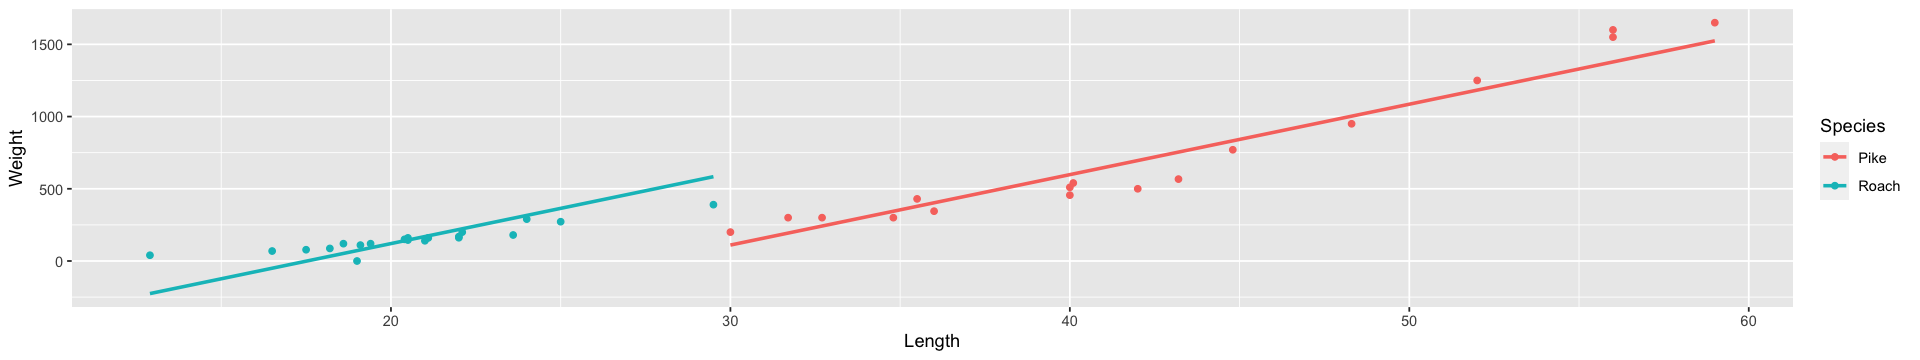

In [141]:
library(moderndive)
ggplot(subset_fish_data, aes(Length, Weight, color=Species)) + 
  geom_point() + 
  geom_parallel_slopes(se=FALSE)


### Interpreting the Model With Interaction

* The previous model assumes that one unit increase contributed equally to determining the weight of a Roach or Pike
  * This is flawed since the unit increase may not be associated with the same mass
    * Ex. 1 cm increase in a shrimp may not contribute to a shrimp as much as 1cm increase in a Roach.

* From Wikipedia:<br>```Interaction describes a situation in which the effect of one causal variable on an outcome depends on the state of a second causal variable (that is, when the effects of the two causes are not additive)```

* Interaction between two variables x and y is modeled in a formula as `x:y`
  * Adds a new term (the variable that consists of the interaction between x and y)




### Interpreting the Model With Interaction

$$
Weight = \beta_0 + \beta_1 \times Legnth + \beta_2 \times Species + \beta_3   \times Legnth\times Species
$$

* Therefore
$$ 
Weight = \beta_0 +  \beta_1 \times Lenght  + \left\{
    \begin{array}{ll}
        \beta_2 + \beta_3 \times Lenght & \mbox{if species is Roach}  \\
        0 & \mbox{Otherwise.}
    \end{array}
\right.
$$

* Which is equivalent to
$$ 
Weight =     + \left\{
    \begin{array}{ll}
        (\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times Lenght & \mbox{if species is Roach}  \\
        \beta_0 + \beta_1 \times Length & \mbox{Otherwise.}
    \end{array}
\right.
$$

* The two lines have, therefore, different slopes and different intercepts.

### Interpreting the Model With Interaction

We have two regression lines for the Roach and Pike Species
  * The two lines have different intercepts and slopes
* Changes in Length may affect the Pikes and Roaches differently (if applicable)
                                                                  

In [123]:
model_2 = lm(Weight~ Length + Species + Length:Species, data=subset_fish_data)

summary(model)


Call:
lm(formula = Weight ~ Length + Species + Length:Species, data = subset_fish_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-193.36  -29.19   -2.66   31.46  161.91 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1540.824    102.837 -14.983 2.79e-16 ***
Length                 53.195      2.371  22.434  < 2e-16 ***
SpeciesRoach         1211.448    157.114   7.711 7.02e-09 ***
Length:SpeciesRoach   -29.876      6.153  -4.855 2.83e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 85.64 on 33 degrees of freedom
Multiple R-squared:  0.9655,	Adjusted R-squared:  0.9623 
F-statistic: 307.5 on 3 and 33 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



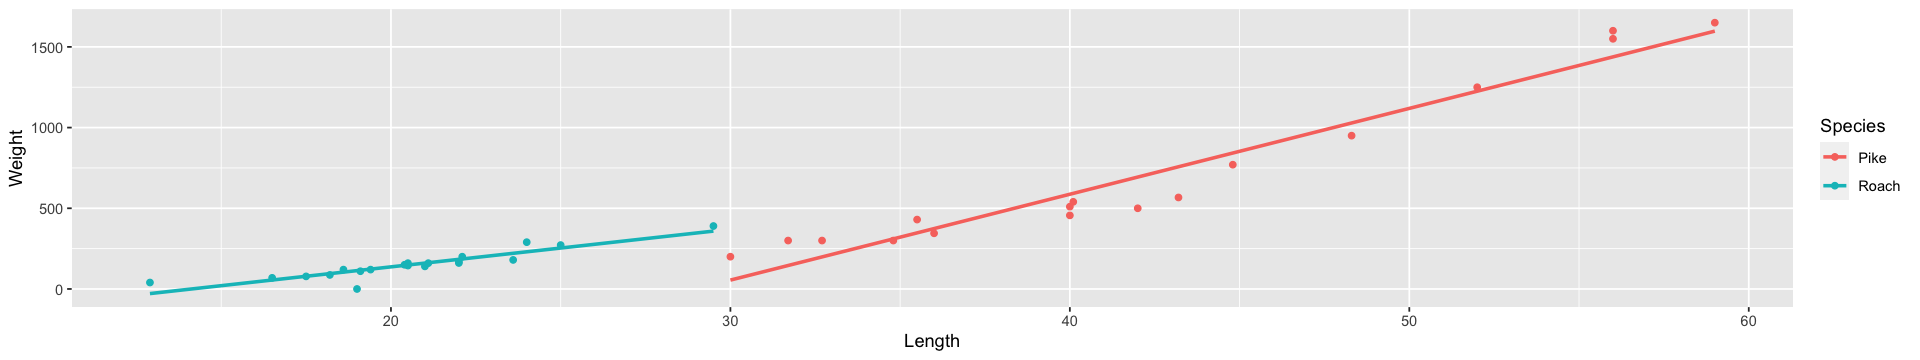

In [143]:
library(moderndive)
ggplot(subset_fish_data, aes(Length, Weight, color=Species)) + 
  geom_point() + 
  geom_smooth(method=lm, se=FALSE)


### Interpreting the Model With Interaction

* Note that the slope for Roach is lower than the slope for Pike. 
    Suggests that an increase in length is associated with a smaller increase in weight in Roach compared to Pike
* Back to the RIKZ data. What if we include all explanatory variables and all two-way interaction 
  * All variables are encoded as  .` in the formula
  * All 2-way interactions are encoded as `()^2` in the formula
  * All variables and all 2-way interactions can be encoded using `weight ~(.)^2`
* The $R^2$ is 0.98. Does this mean that we've cracked the code?
  * * The answer lies in what we just covered?

In [147]:
model = lm(Weight ~(.)^2, data=fish_data)
summary(model)


Call:
lm(formula = Weight ~ (.)^2, data = fish_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-149.459  -15.302    0.001   12.402  147.838 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              288.799    260.882   1.107 0.270366    
SpeciesParkki            -53.252    207.177  -0.257 0.797562    
SpeciesPerch            -154.534    248.690  -0.621 0.535447    
SpeciesPike             -227.038    370.728  -0.612 0.541352    
SpeciesRoach            -113.625    248.718  -0.457 0.648558    
SpeciesSmelt            -193.073    307.250  -0.628 0.530867    
SpeciesWhitefish        -430.122    278.921  -1.542 0.125520    
Length                   -74.026     18.524  -3.996 0.000108 ***
Height                    14.799     43.171   0.343 0.732303    
Width                    188.587     96.130   1.962 0.051957 .  
SpeciesParkki:Length      27.934     34.159   0.818 0.415021    
SpeciesPerch:Length       30.233     11.083   2

In [151]:
fish_data %>% group_by(Species) %>% count()

Species   n 
1 Bream     35
2 Parkki    11
3 Perch     56
4 Pike      17
5 Roach     20
6 Smelt     14
7 Whitefish  6

### Interpreting the Model With Interaction

* 7 categories, small dataset, and a lot of variables to explain
  * Easy to model a category that contains a small number of species
    * Model overfitting?
  * Also, we are most likely overfitting the data.
    * Models that are way too flexible and pass by as many points as possible

In [212]:
set.seed(15)
x = rnorm(10, 4, 1)
y = rnorm(10, 6, 1)
z = rnorm(10, 1, 1)

error = rnorm(10, 0, 1)
output = 3*x + 2*y + error
model = lm(output ~ x + y)
summary(model)


Call:
lm(formula = output ~ x + y)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0390 -0.5200 -0.1104  0.6100  1.3109 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.8111     2.5399  -1.107 0.304961    
x             3.2706     0.3146  10.397 1.65e-05 ***
y             2.3179     0.3637   6.374 0.000377 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9007 on 7 degrees of freedom
Multiple R-squared:  0.955,	Adjusted R-squared:  0.9421 
F-statistic: 74.27 on 2 and 7 DF,  p-value: 1.934e-05


In [213]:
model = lm(output ~ x + y + z)
summary(model)


Call:
lm(formula = output ~ x + y + z)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59148 -0.36529  0.01082  0.36148  0.58074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.3746     1.4628  -2.307  0.06052 .  
x             3.2777     0.1803  18.179 1.78e-06 ***
y             2.6448     0.2245  11.778 2.26e-05 ***
z            -0.9552     0.2441  -3.913  0.00787 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5162 on 6 degrees of freedom
Multiple R-squared:  0.9873,	Adjusted R-squared:  0.981 
F-statistic: 155.8 on 3 and 6 DF,  p-value: 4.43e-06
